In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df1 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale Flat Prices 1990 - 1999.csv')
df2 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale Flat Prices 2000 - Feb 2012.csv')
df3 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale Flat Prices From Mar 2012 to Dec 2014.csv')
df4 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale Flat Prices From Jan 2015 to Dec 2016.csv')
df5 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale flat prices based on registration date from Jan-2017 onwards.csv')

In [3]:
# Concatenate the dataframes along the rows (axis=0)
flat_df = pd.concat([df1, df2, df3, df4, df5], axis=0).reset_index(drop=True)

# Print the concatenated dataframe
print(flat_df)

          month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
938264  2024-10      YISHUN     5 ROOM   870      YISHUN ST 81     04 TO 06   
938265  2024-10      YISHUN  EXECUTIVE   654      YISHUN AVE 4     10 TO 12   
938266  2024-10      YISHUN  EXECUTIVE   654      YISHUN AVE 4     04 TO 06   
938267  2024-10      YISHUN  EXECUTIVE   358    YISHUN RING RD     01 TO 03   
938268  2024-10      YISHUN  EXECUTIVE   824      YISHUN ST 81     10 TO 12   

        floor_area_sqm      flat_model  lease_comme

In [4]:
flat_df.drop_duplicates().reset_index(inplace=True)

In [5]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938269 entries, 0 to 938268
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                938269 non-null  object 
 1   town                 938269 non-null  object 
 2   flat_type            938269 non-null  object 
 3   block                938269 non-null  object 
 4   street_name          938269 non-null  object 
 5   storey_range         938269 non-null  object 
 6   floor_area_sqm       938269 non-null  float64
 7   flat_model           938269 non-null  object 
 8   lease_commence_date  938269 non-null  int64  
 9   resale_price         938269 non-null  float64
 10  remaining_lease      229219 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.7+ MB


In [6]:
print(flat_df.shape)

(938269, 11)


In [7]:
percent_null_remaining_lease=((flat_df['remaining_lease'].isnull().sum())/flat_df.shape[0])*100
print(percent_null_remaining_lease)

75.57001243779769


In [8]:
flat_df.drop(columns=['remaining_lease'], inplace=True)

In [9]:
column_names = flat_df.columns.tolist()
print(column_names)
flat_df.info()

['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938269 entries, 0 to 938268
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                938269 non-null  object 
 1   town                 938269 non-null  object 
 2   flat_type            938269 non-null  object 
 3   block                938269 non-null  object 
 4   street_name          938269 non-null  object 
 5   storey_range         938269 non-null  object 
 6   floor_area_sqm       938269 non-null  float64
 7   flat_model           938269 non-null  object 
 8   lease_commence_date  938269 non-null  int64  
 9   resale_price         938269 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 71.6+ MB


In [10]:
flat_df.rename(columns={'month': 'yearly_month'}, inplace=True)

In [11]:
print(flat_df)

       yearly_month        town  flat_type block       street_name  \
0           1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
1           1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
2           1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
3           1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
4           1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1   
...             ...         ...        ...   ...               ...   
938264      2024-10      YISHUN     5 ROOM   870      YISHUN ST 81   
938265      2024-10      YISHUN  EXECUTIVE   654      YISHUN AVE 4   
938266      2024-10      YISHUN  EXECUTIVE   654      YISHUN AVE 4   
938267      2024-10      YISHUN  EXECUTIVE   358    YISHUN RING RD   
938268      2024-10      YISHUN  EXECUTIVE   824      YISHUN ST 81   

       storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0          10 TO 12            31.0        IMPROVED                 1977   
1      

In [12]:
flat_df[['storey_start_point', 'storey_end_point']] = flat_df['storey_range'].str.split(' TO ', expand=True)

# Convert the new columns to integers
flat_df['storey_start_point'] = flat_df['storey_start_point'].astype(int)
flat_df['storey_end_point'] = flat_df['storey_end_point'].astype(int)

flat_df[['year', 'month']] = flat_df['yearly_month'].str.split('-', expand=True)

flat_df['year']=flat_df['year'].astype(int)
flat_df['month']=flat_df['month'].astype(int)

flat_df.rename(columns={'lease_commence_date': 'lease_commence_year'}, inplace=True)
flat_df['lease_end_year'] = flat_df['lease_commence_year'] + 99

flat_df.drop(columns=['storey_range'], inplace=True)
flat_df.drop(columns=['yearly_month'], inplace=True)
flat_df.drop(columns=['lease_commence_year'], inplace=True)

In [13]:
#To use in streamlit web page
print(flat_df['storey_start_point'].min())
print(flat_df['storey_start_point'].max())

1
49


In [14]:
print(len(flat_df['town'].unique()))
print(len(flat_df['flat_type'].unique()))
print(len(flat_df['block'].unique()))
print(len(flat_df['street_name'].unique()))
print(len(flat_df['flat_model'].unique()))

27
8
2719
588
34


In [15]:
flat_df.to_csv('sfrpp.csv', index=False)

In [16]:
from scipy.stats import skew

for col in ['floor_area_sqm','lease_end_year','storey_start_point','storey_end_point', 
            'floor_area_sqm', 'resale_price', 'year','month']:
    print(f'Skewness of {col}: {skew(flat_df[col])}')

Skewness of floor_area_sqm: 0.36632628321372096
Skewness of lease_end_year: 0.6590696948036607
Skewness of storey_start_point: 1.3604703308379573
Skewness of storey_end_point: 1.3611204112045308
Skewness of floor_area_sqm: 0.36632628321372096
Skewness of resale_price: 0.9667625846189782
Skewness of year: 0.29012370611677196
Skewness of month: -0.037973303348287905


In [17]:
# Apply square root transformation
skew_columns = ['storey_start_point', 'storey_end_point', 'resale_price']

for col in skew_columns:
    flat_df[col + '_sqrt'] = np.sqrt(flat_df[col])

# Check skewness after square root transformation
for col in skew_columns:
    print(f"Skewness of {col} after sqrt transformation: {skew(flat_df[col + '_sqrt'].dropna())}")

flat_df.drop(columns=['storey_start_point','storey_end_point','resale_price'], inplace=True)

Skewness of storey_start_point after sqrt transformation: 0.1501574172030268
Skewness of storey_end_point after sqrt transformation: 0.4183413717374945
Skewness of resale_price after sqrt transformation: 0.1269035571502253


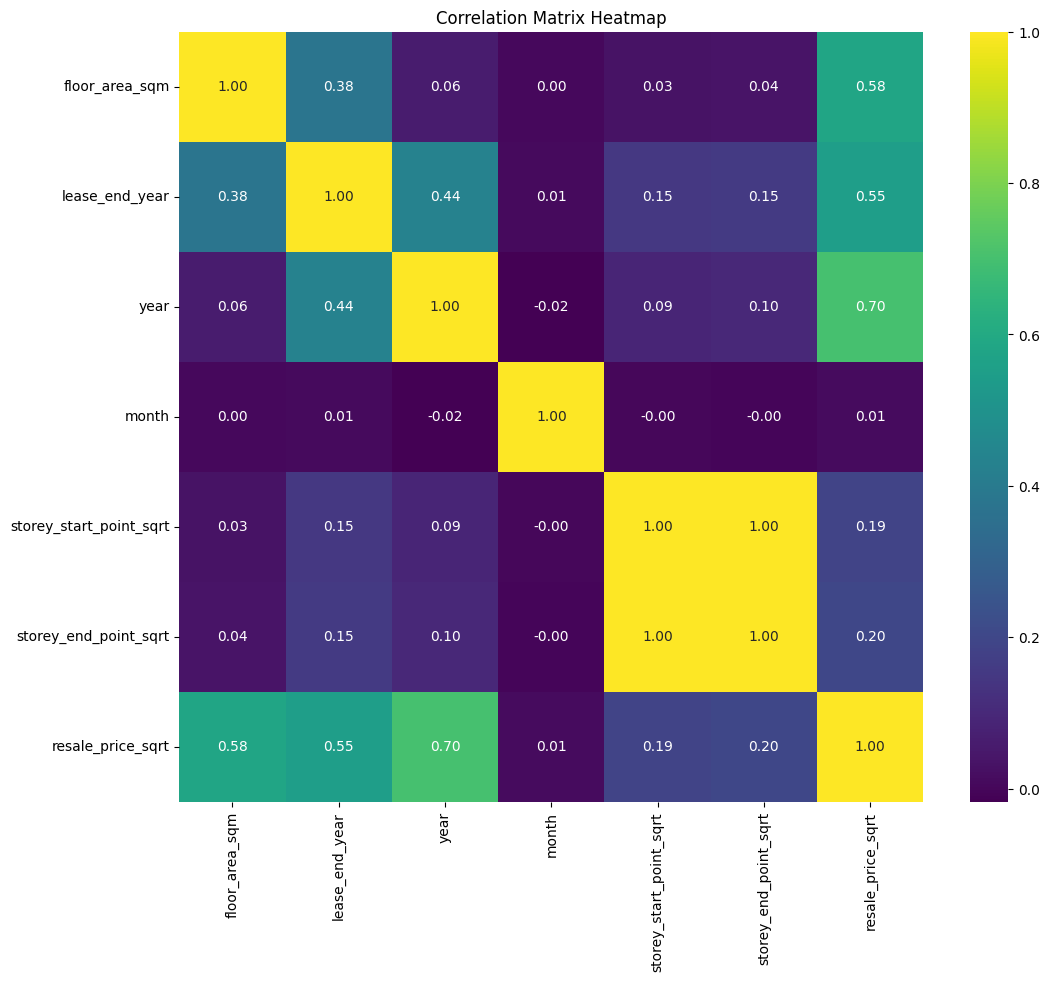

In [18]:
correlation_matrix = flat_df[['floor_area_sqm', 'lease_end_year', 'year', 'month', 'storey_start_point_sqrt', 'storey_end_point_sqrt', 'resale_price_sqrt']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
flat_df.drop(columns=['storey_end_point_sqrt'], inplace=True)

In [20]:
def plot(df, column):
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column, color='green')
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50, color="red")
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column, color='indigo')
    plt.title(f'Violin Plot for {column}')
    plt.show()

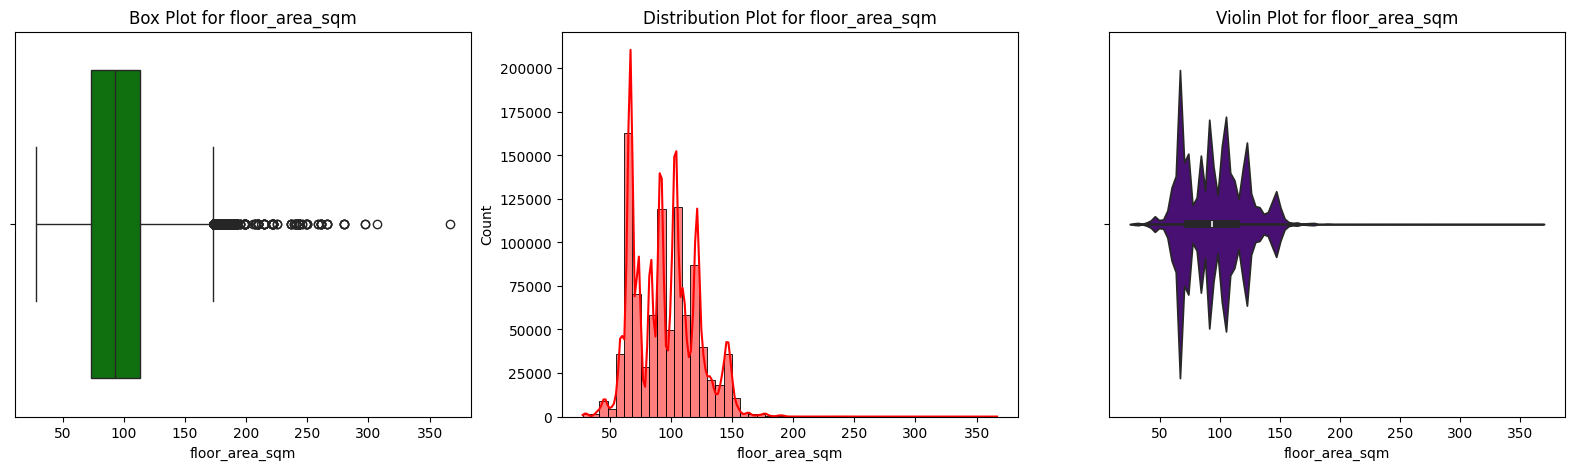

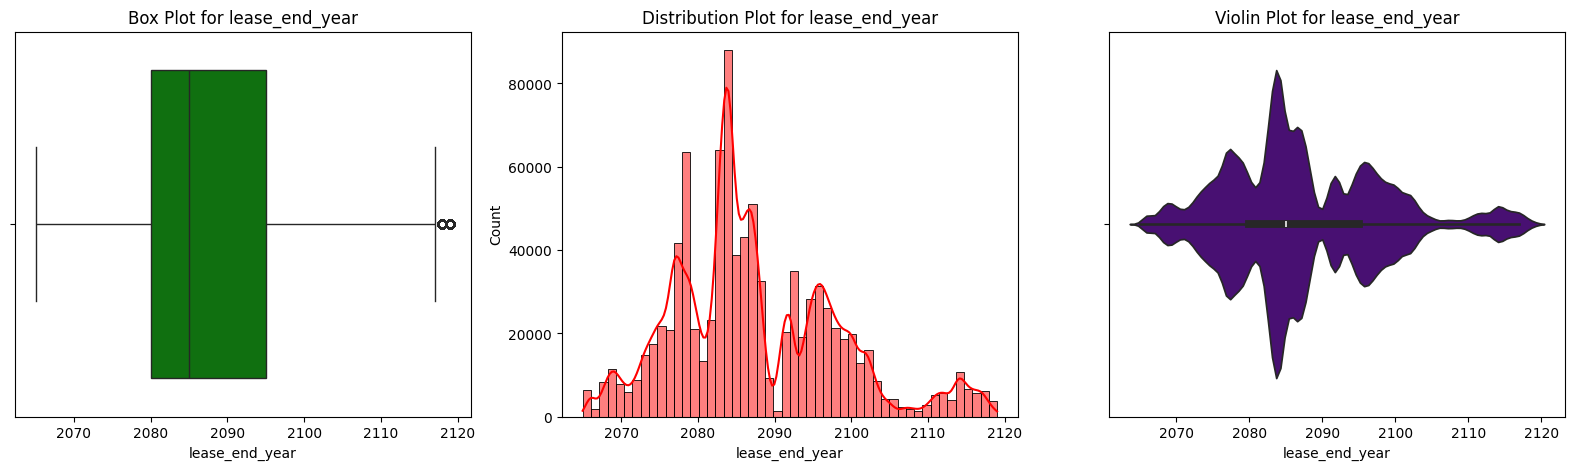

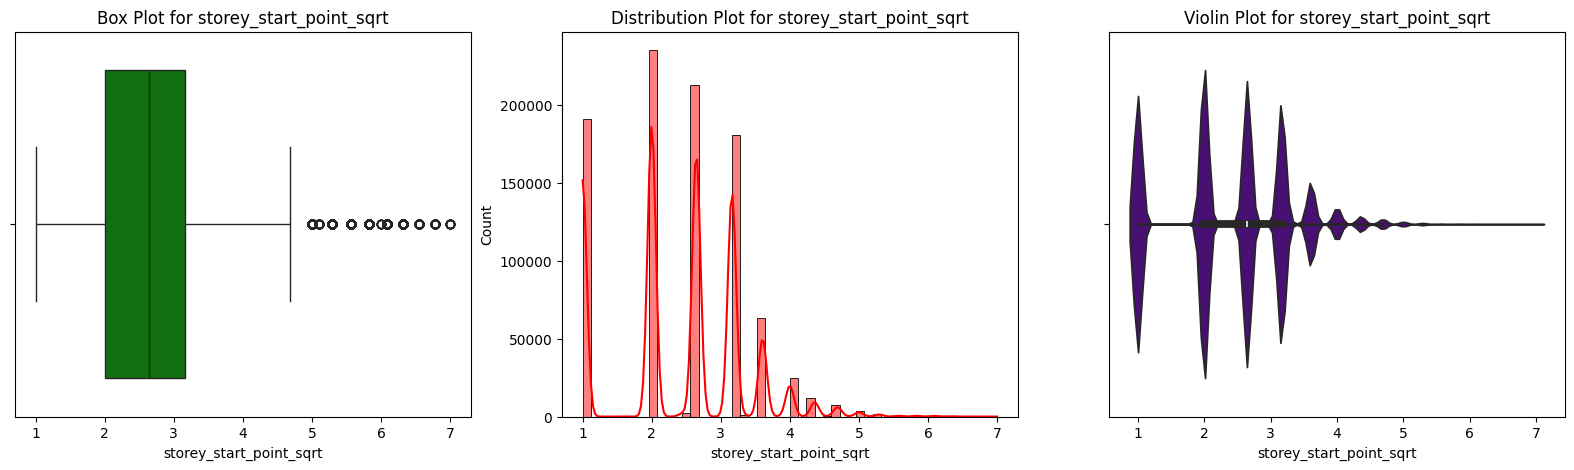

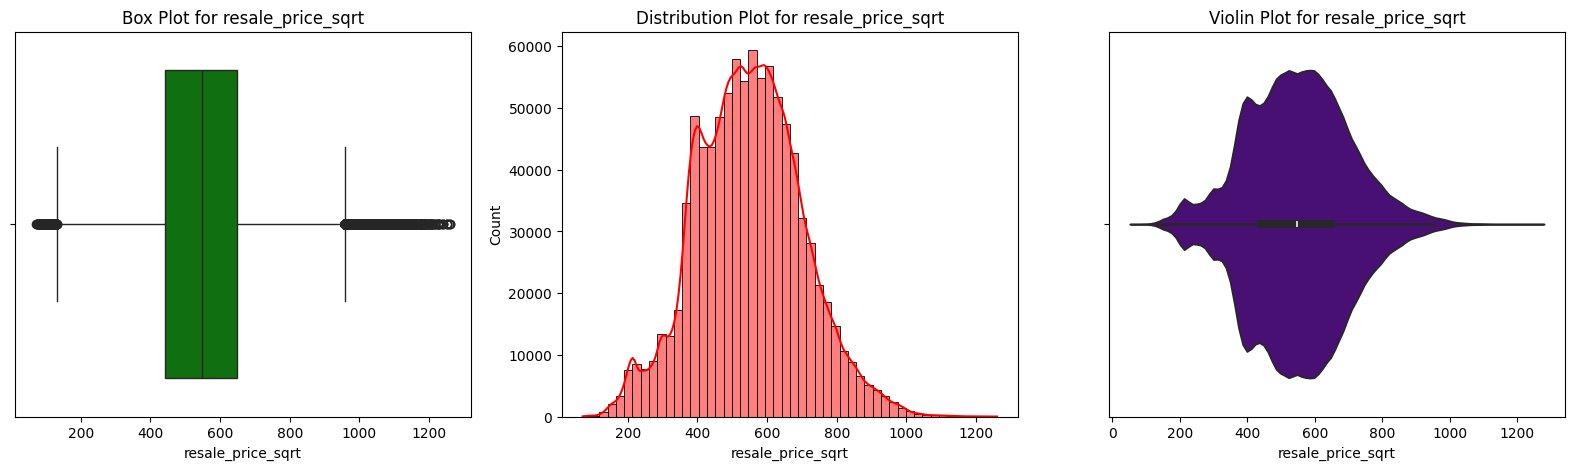

In [21]:
#Outliers Visualisation
for col in ['floor_area_sqm','lease_end_year','storey_start_point_sqrt','resale_price_sqrt']:
    plot(flat_df, col)

In [22]:
#Outlier treatment

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.75)
    IQR = Q2 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q2 + 1.5 * IQR
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

# Apply the IQR method to continuous variables
continuous_var = ['floor_area_sqm','lease_end_year','storey_start_point_sqrt','resale_price_sqrt']
for col in continuous_var:
    flat_df = remove_outliers_iqr(flat_df, col)

# Check the shape of the dataframe after outlier removal
print(f"Reshaped Dataframe after Outlier Treatment: {flat_df.shape}")

# Reset the index
flat_df.reset_index(drop=True, inplace=True)

Reshaped Dataframe after Outlier Treatment: (920592, 11)


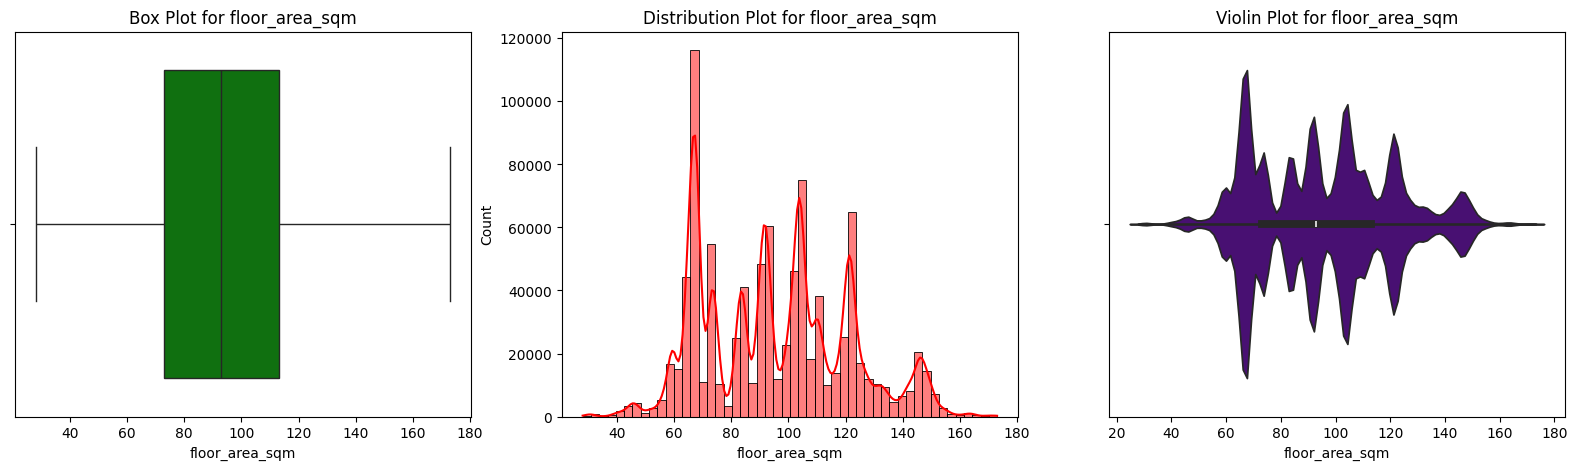

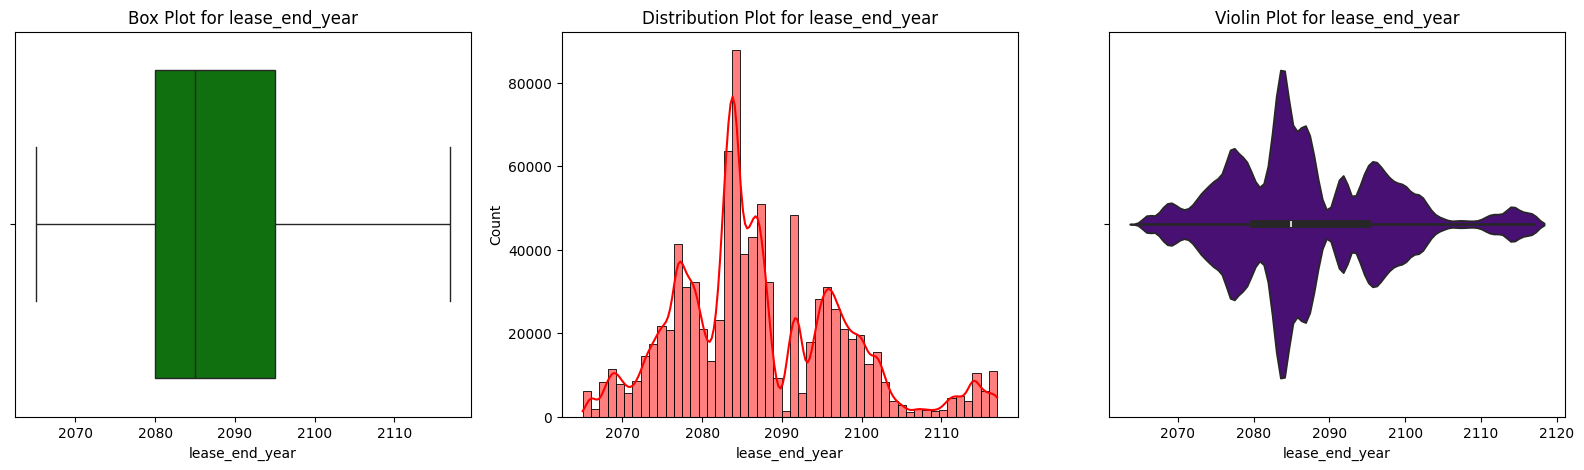

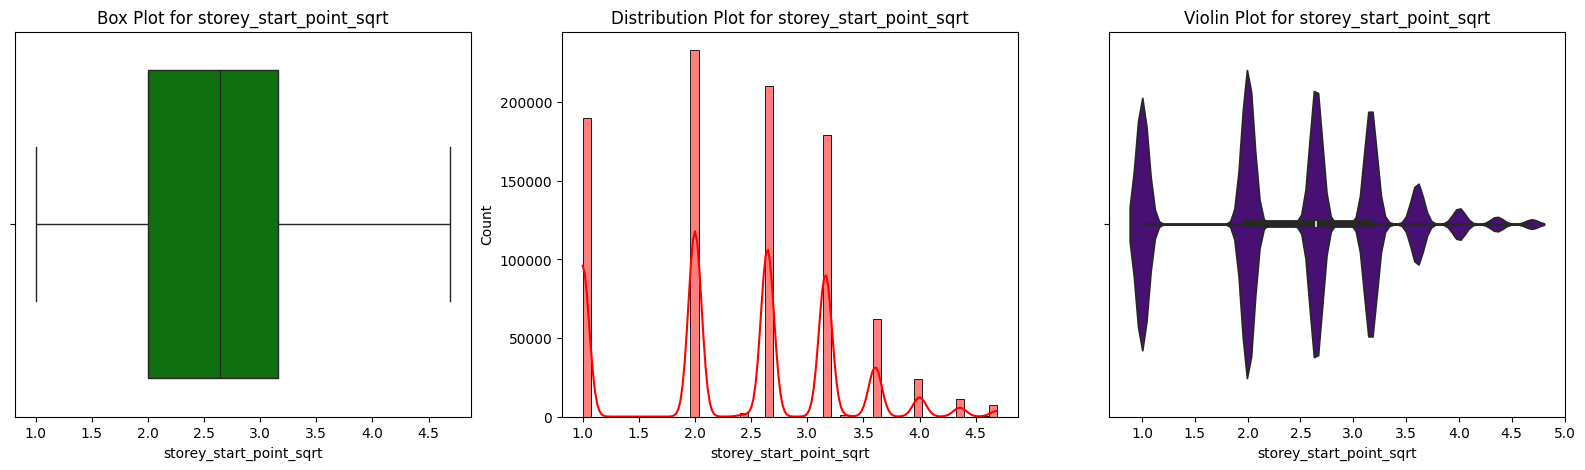

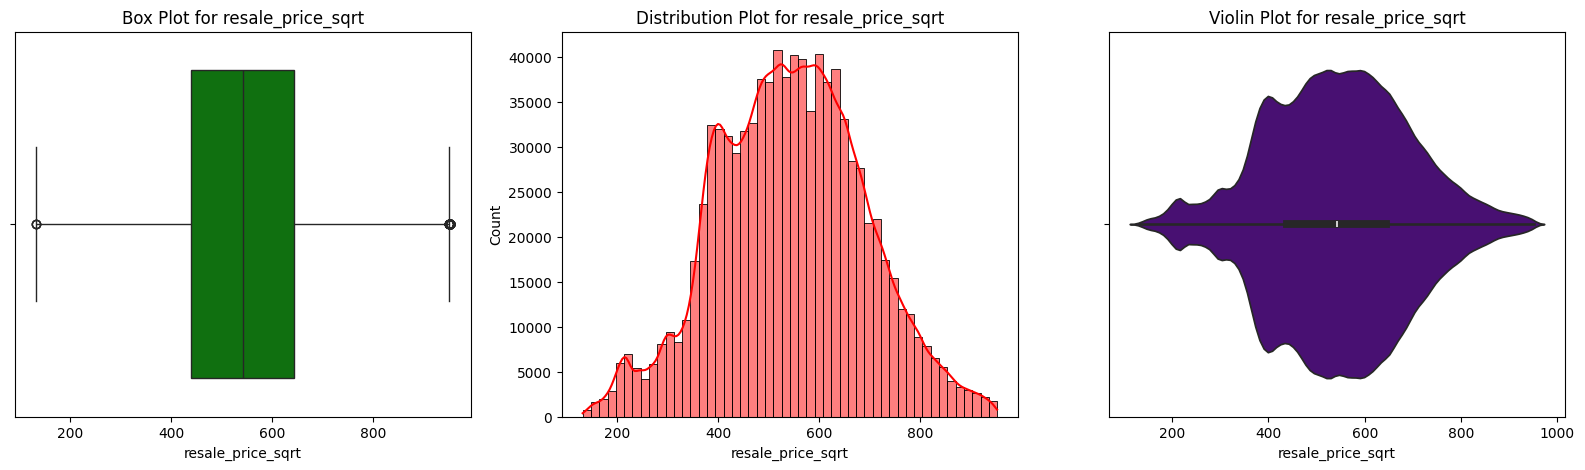

In [23]:
# plotting the features to check skew and outliers
for col in ['floor_area_sqm','lease_end_year','storey_start_point_sqrt', 'resale_price_sqrt']:
    plot(flat_df, col)

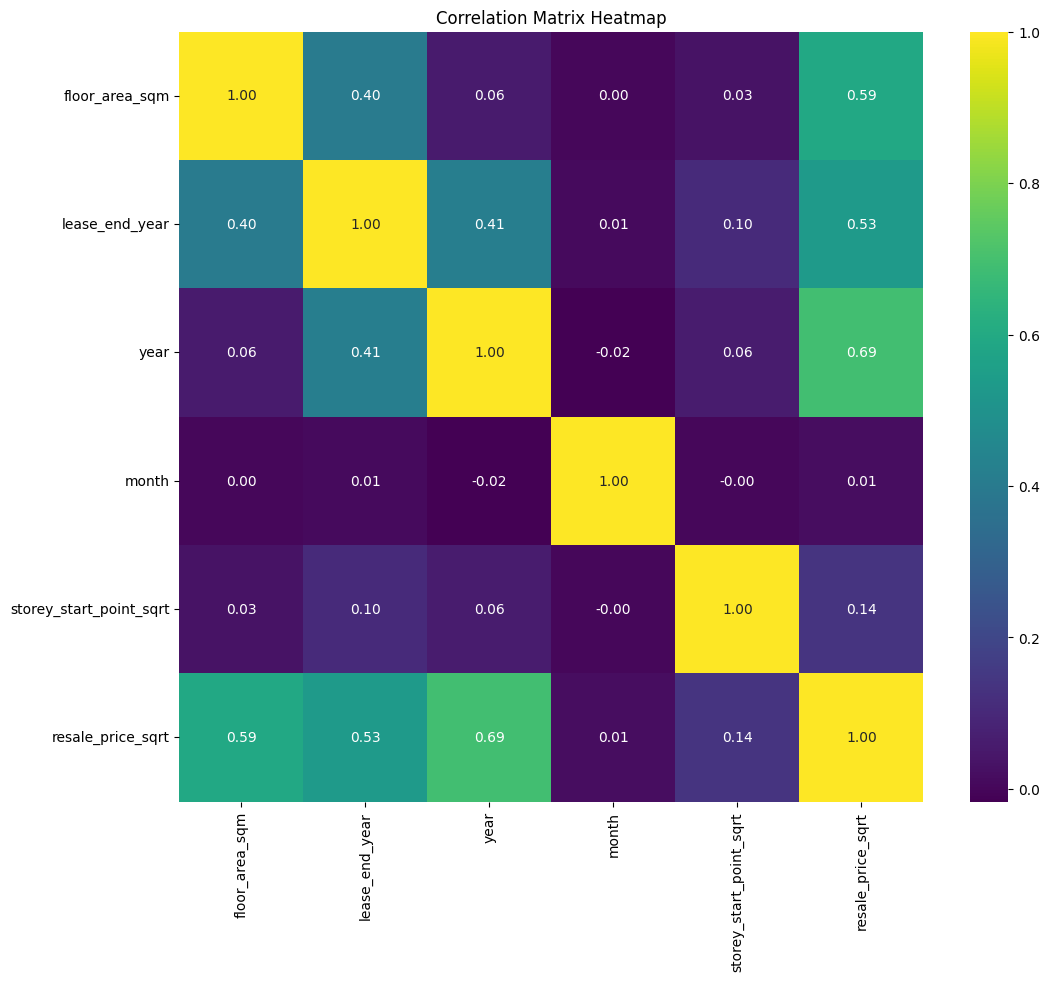

In [24]:
correlation_matrix = flat_df[['floor_area_sqm', 'lease_end_year', 'year', 'month', 'storey_start_point_sqrt', 'resale_price_sqrt']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
#------------------#
# MACHINE LEARNING #
#------------------#

In [26]:
price_pred_df=flat_df.copy()
price_pred_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,year,month,lease_end_year,storey_start_point_sqrt,resale_price_sqrt
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1990,1,2075,2.000000,217.255610
1,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,67.0,NEW GENERATION,1990,1,2076,1.000000,214.476106
2,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,67.0,NEW GENERATION,1990,1,2076,2.645751,204.939015
3,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1990,1,2076,3.162278,194.935887
4,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1990,1,2076,2.000000,200.000000


In [27]:
print(len(price_pred_df['town'].unique()))
print(len(price_pred_df['flat_type'].unique()))
print(len(price_pred_df['block'].unique()))
print(len(price_pred_df['street_name'].unique()))
print(len(price_pred_df['flat_model'].unique()))

27
8
2647
579
34


In [28]:
price_pred_df.drop(columns=['block','street_name'], inplace=True)

In [29]:
# Pre-Processing:

# dropping hypen:
price_pred_df['flat_type']=price_pred_df['flat_type'].str.replace("-"," ")

# Deal with capitalized values
price_pred_df['flat_model'] = price_pred_df['flat_model'].str.lower()

In [30]:
print(len(price_pred_df['flat_type'].unique()))
print(len(price_pred_df['flat_model'].unique()))

7
21


In [31]:
from sklearn.preprocessing import LabelEncoder

def encode(df,columns):
    le = LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    keys =le.classes_
    values = le.transform(keys)

    for key,value in zip(keys,values):
        print(key,":",value)

In [32]:
encode(price_pred_df,'town')
encode(price_pred_df,'flat_type')
encode(price_pred_df,'flat_model')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26
1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI GENERATION : 6
2-room : 0
3gen : 1
adjoined flat : 2
apartment : 3
dbss : 4
improved : 5
improved-maisonette : 6
maisonette : 7
model a : 8
model a-maisonette : 9
model a2 : 10
multi generation : 11
new generation : 12
premium apartment : 13
premium apartment loft : 14
premium maisonette : 15
simplified : 16
standard : 17
terrace : 18
type s1 : 19
type s2 : 20


In [33]:
price_pred_df

,town,flat_type,floor_area_sqm,flat_model,year,month,lease_end_year,storey_start_point_sqrt,resale_price_sqrt
0,0,2,73.0,12,1990,1,2075,2.000000,217.255610
1,0,2,67.0,12,1990,1,2076,1.000000,214.476106
2,0,2,67.0,12,1990,1,2076,2.645751,204.939015
3,0,2,67.0,12,1990,1,2076,3.162278,194.935887
4,0,2,67.0,12,1990,1,2076,2.000000,200.000000
...,...,...,...,...,...,...,...,...,...
920587,26,4,112.0,5,2024,10,2117,2.645751,865.383152
920588,26,4,123.0,5,2024,10,2087,2.645751,853.229160
920589,26,4,141.0,8,2024,10,2091,1.000000,894.427191
920590,26,4,122.0,5,2024,10,2086,2.000000,830.662386


In [34]:
def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['resale_price_sqrt'],axis=1)
        y=df['resale_price_sqrt']

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        results={}

        for algorithm in algorithms:
                print(algorithm.__name__)
                model=algorithm().fit(X_train,y_train)
                y_pred=model.predict(X_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results

In [35]:
algorithms = [LinearRegression,
              DecisionTreeRegressor,
              ExtraTreesRegressor,
              RandomForestRegressor,
              GradientBoostingRegressor]

best_algorithm, results = best_ML_algorithm(price_pred_df, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**", best_algorithm)

LinearRegression
DecisionTreeRegressor
ExtraTreesRegressor
RandomForestRegressor
GradientBoostingRegressor
**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                     52.001756         4355.742964                65.998053  0.798102
DecisionTreeRegressor                18.941839          732.150099                27.058272  0.966063
ExtraTreesRegressor                  16.278061          513.870882                22.668720  0.976181
RandomForestRegressor                15.054984          438.737898                20.946071  0.979664
GradientBoostingRegressor            27.991952         1435.794750                37.891882  0.933448
**Best Algorithm:** RandomForestRegressor


In [36]:
#Features & Target:
x=price_pred_df.drop(columns=['resale_price_sqrt'],axis=1)
y=price_pred_df['resale_price_sqrt']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=53)

# Model Training:
model_rfr = RandomForestRegressor(n_estimators=150,max_depth=20)
model_rfr.fit(X_train, y_train)

# Prediction:
y_predict = model_rfr.predict(X_test)

# Evaluation:
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))
print('R² score: {:.4f}'.format(r2))

Mean Absolute Error: 15.5859
Mean Squared Error: 466.7543
Root Mean Squared Error: 21.6045
R² score: 0.9784


In [37]:
feature_scores = pd.Series(model_rfr.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

year                       0.569595
floor_area_sqm             0.291350
flat_type                  0.056268
town                       0.043329
lease_end_year             0.021253
month                      0.006338
flat_model                 0.005965
storey_start_point_sqrt    0.005902
dtype: float64

In [ ]:
with open("sfrpp_randomforestregressor.pkl","wb") as files:
    pickle.dump(model_rfr, files)

In [ ]:
with open('sfrpp_randomforestregressor.pkl','rb') as files:
    predict_model=pickle.load(files)

In [ ]:
price_pred_df

In [46]:
input=predict_model.predict(np.array([[0,2,67.0,12,1978,107,2017,1,np.sqrt(1)]]))
print(f"Sqrt of Predicted Resale Price: {input}")
predict_resale_price = input[0] ** 2
print(f"Predicted Resale Price: {predict_resale_price:.2f}")

Sqrt of Predicted Resale Price: [533.99181989]
Predicted Resale Price: 285147.26


C:\Users\vpkdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
